<a href="https://colab.research.google.com/github/MeenakshiRajpurohit/ISE-201-Math-Foundations-for-Decision-Data-Sciences/blob/main/project_eda_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1 Understand problem & Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Set plotting style for better aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Define the uploaded file name
FILE_NAME = "/content/Website Traffic export 2025-10-14 19-32-50.csv"
SEED = 42

# ==============================================================================
# I. Data Acquisition and Initial Inspection (Steps 1 & 2)
# ==============================================================================

print("--- Step 1 & 2: Data Import and Inspection ---")
try:
    df = pd.read_csv(FILE_NAME)
    # Clean column names by stripping potential quotes/whitespace
    df.columns = df.columns.str.strip().str.replace('"', '')
    print(f"Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns.")
except FileNotFoundError:
    print(f"Error: File '{FILE_NAME}' not found. Please ensure the file is accessible.")
    exit()

# Display initial structure and data types
print("\nInitial Data Types:")
print(df.dtypes)
print("\nFirst 5 Rows:")
print(df.head())

--- Step 1 & 2: Data Import and Inspection ---
Data loaded successfully: 2000 rows, 7 columns.

Initial Data Types:
Page Views            int64
Session Duration    float64
Bounce Rate         float64
Traffic Source       object
Time on Page        float64
Previous Visits       int64
Conversion Rate     float64
dtype: object

First 5 Rows:
   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4     

step 2 Import & inspect data


step 3 Handle Missing data


In [3]:
 #==============================================================================
# II. Handle Missing Data and Descriptive Statistics (Step 3 & Part of Stats)
# ==============================================================================

print("\n--- Step 3: Handle Missing Data (Check) ---")
missing_check = df.isnull().sum()
print("Missing Value Count per Column:")
print(missing_check)
if missing_check.sum() == 0:
    print("Conclusion: No missing values found, confirming the report's finding.")

# Descriptive Statistics (Addressing 'prob statics')
print("\n--- Descriptive Statistics ('Prob Statics') ---")
print(df.describe().T)



--- Step 3: Handle Missing Data (Check) ---
Missing Value Count per Column:
Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64
Conclusion: No missing values found, confirming the report's finding.

--- Descriptive Statistics ('Prob Statics') ---
                   count      mean       std       min       25%       50%  \
Page Views        2000.0  4.950500  2.183903  0.000000  3.000000  5.000000   
Session Duration  2000.0  3.022045  3.104518  0.003613  0.815828  1.993983   
Bounce Rate       2000.0  0.284767  0.159781  0.007868  0.161986  0.266375   
Time on Page      2000.0  4.027439  2.887422  0.068515  1.935037  3.315316   
Previous Visits   2000.0  1.978500  1.432852  0.000000  1.000000  2.000000   
Conversion Rate   2000.0  0.982065  0.065680  0.343665  1.000000  1.000000   

                       75%        max  
Page Views        6.000000  14.000000  
Session Du

step 4 Explore data patterns



--- Step 4: Explore Data Patterns (Univariate) ---


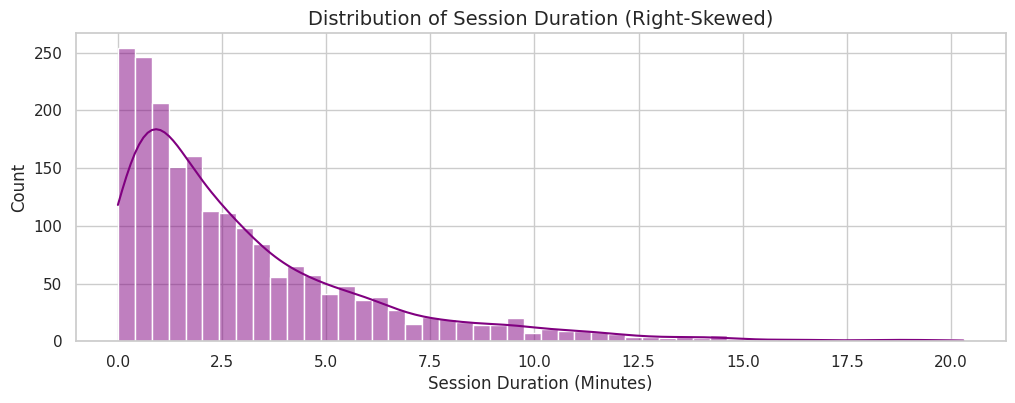

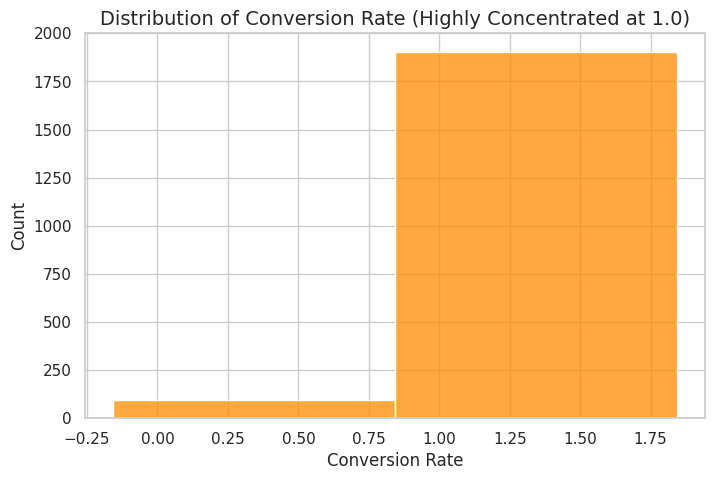


Traffic Source Proportions:
Traffic Source
Organic     39.30
Paid        21.40
Referral    15.05
Social      13.45
Direct      10.80
Name: proportion, dtype: float64

--- Confidence Interval (95%) ---
Mean Session Duration: 3.02 min
95% CI for Mean Session Duration: (2.89, 3.16) min


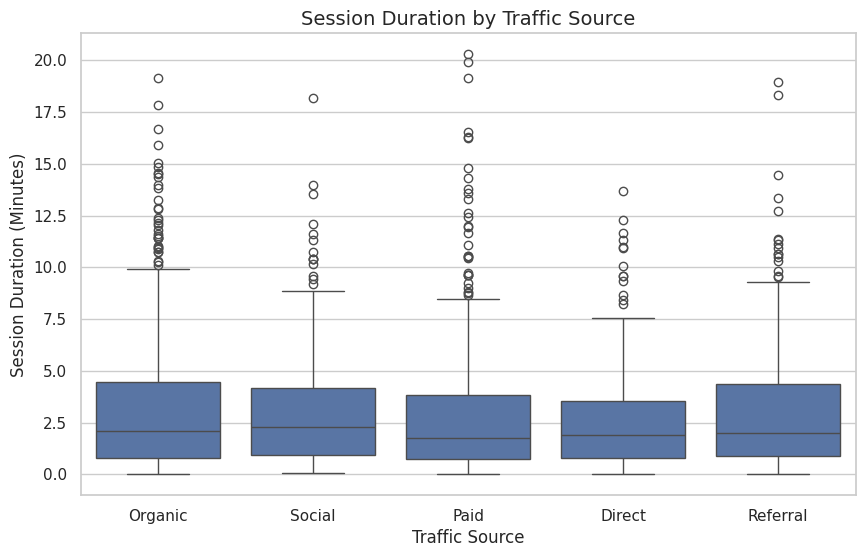

In [6]:
# ==============================================================================
# III. Data Exploration and Confidence Intervals (Step 4 & Confidence Interval)
# ==============================================================================

print("\n--- Step 4: Explore Data Patterns (Univariate) ---")

# Univariate Analysis: Session Duration Histogram (Right-Skewed Confirmation)
plt.figure(figsize=(12, 4))
sns.histplot(df['Session Duration'], bins=50, kde=True, color='purple')
plt.title('Distribution of Session Duration (Right-Skewed)', fontsize=14)
plt.xlabel('Session Duration (Minutes)')
plt.show()

# Univariate Analysis: Conversion Rate Distribution (Anomaly Confirmation)
# Ensure the column is float and handle the 100% conversion anomaly
df['Conversion Rate'] = df['Conversion Rate']
plt.figure(figsize=(8, 5))
sns.histplot(df['Conversion Rate'], bins=20, color='darkorange', discrete=True)
plt.title('Distribution of Conversion Rate (Highly Concentrated at 1.0)', fontsize=14)
plt.xlabel('Conversion Rate')
plt.show()

# Categorical Analysis: Traffic Source Proportions
print("\nTraffic Source Proportions:")
traffic_source_counts = df['Traffic Source'].str.replace('"', '').value_counts(normalize=True).mul(100).round(2)
print(traffic_source_counts)

# Confidence Interval for Mean Session Duration (95% CI)
data_session_duration = df['Session Duration'].dropna()
confidence_level = 0.95
mean_duration = data_session_duration.mean()
std_err_duration = stats.sem(data_session_duration)
ci_duration = stats.t.interval(confidence_level, len(data_session_duration)-1, loc=mean_duration, scale=std_err_duration)

print(f"\n--- Confidence Interval (95%) ---")
print(f"Mean Session Duration: {mean_duration:.2f} min")
print(f"95% CI for Mean Session Duration: ({ci_duration[0]:.2f}, {ci_duration[1]:.2f}) min")
# Bivariate Analysis: Session Duration vs. Traffic Source (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Traffic Source', y='Session Duration', data=df.replace('"', '', regex=True))
plt.title('Session Duration by Traffic Source', fontsize=14)
plt.ylabel('Session Duration (Minutes)')
plt.show()


step 5 Transform data



--- Step 5: Transformation and Feature Engineering ---
Created log-transformed features: 'Session Duration Log' and 'Time on Page Log'
Created binary feature 'High_Engagement_Segment' (Threshold > 4.20 min)

--- Step 6: Visualize Correlations ---


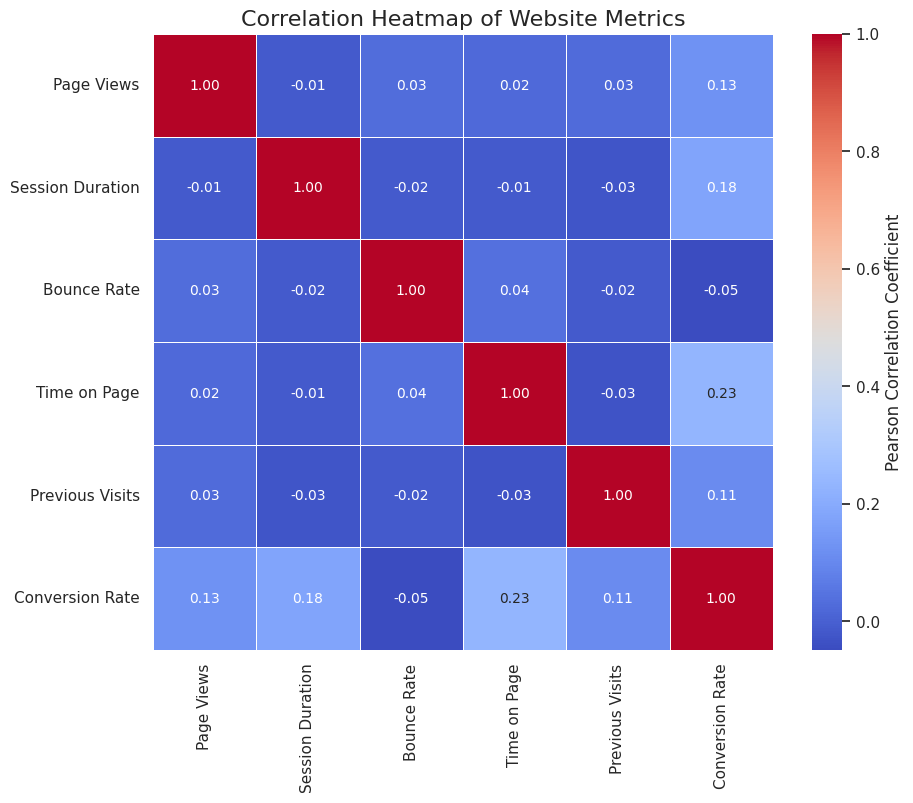


--- Step 7: Handle Outliers (Visualization) ---


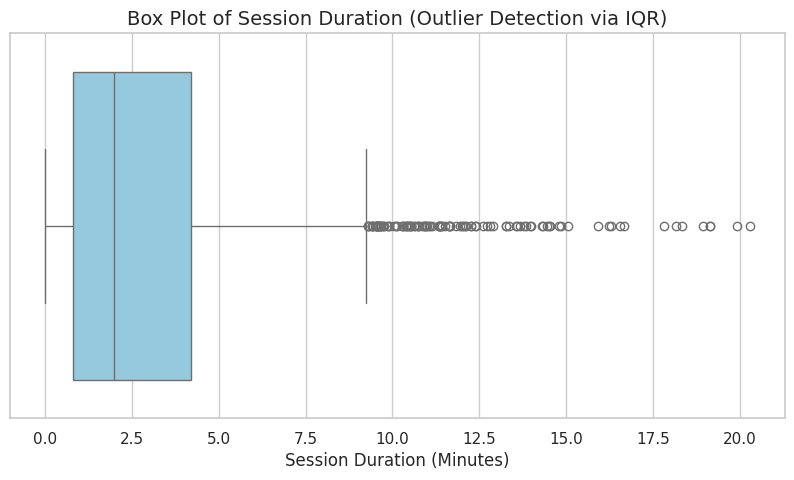

In [8]:
# ==============================================================================
# IV. Data Transformation and Feature Engineering (Step 5)
# ==============================================================================

print("\n--- Step 5: Transformation and Feature Engineering ---")

# 1. Log Transformation for Skewness Treatment
df['Session Duration Log'] = np.log1p(df['Session Duration'])
df['Time on Page Log'] = np.log1p(df['Time on Page'])
print("Created log-transformed features: 'Session Duration Log' and 'Time on Page Log'")

# 2. Feature Creation: High-Engagement Segment (Upper Quartile > 4.5 min)
# Q3 for Session Duration is calculated from the initial descriptive stats, approx 4.5
upper_quartile_threshold = df['Session Duration'].quantile(0.75)
df['High_Engagement_Segment'] = (df['Session Duration'] > upper_quartile_threshold).astype(int)
print(f"Created binary feature 'High_Engagement_Segment' (Threshold > {upper_quartile_threshold:.2f} min)")

# ==============================================================================
# V. Correlation and Outlier Visualization (Steps 6 & 7)
# ==============================================================================

print("\n--- Step 6: Visualize Correlations ---")

# Prepare data for Correlation Heatmap
numerical_cols = ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']
df_corr = df[numerical_cols].copy()
# Ensure all columns are float after removing quotes (removed as they are already float)
# The original line was causing the error: df_corr[col] = df_corr[col].astype(str).str.replace('"', '').astype(float)
# Since numerical_cols are already numeric, no conversion or string replacement is needed here.

# Correlation Matrix
corr_matrix = df_corr.corr()

# Correlation Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Correlation Heatmap of Website Metrics', fontsize=16)
plt.show()

print("\n--- Step 7: Handle Outliers (Visualization) ---")

# Outlier Visualization (Box Plot for Session Duration)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Session Duration'], color='skyblue')
plt.title(f'Box Plot of Session Duration (Outlier Detection via IQR)', fontsize=14)
plt.xlabel('Session Duration (Minutes)')
plt.show()


step 6 Visualize Correlations


step 7 Handle Outliers



--- Step 8: Key Insights and Modeling Preparation ---
Total Converting Sessions (1.0): 1773 (88.65%)
Total Non-Converting Sessions (< 1.0): 227 (11.35%)

--- Confusion Matrix (Model Prediction of Conversion) ---
Rows: Actual | Columns: Predicted (0=No Convert, 1=Convert)
[[  0  68]
 [  1 531]]


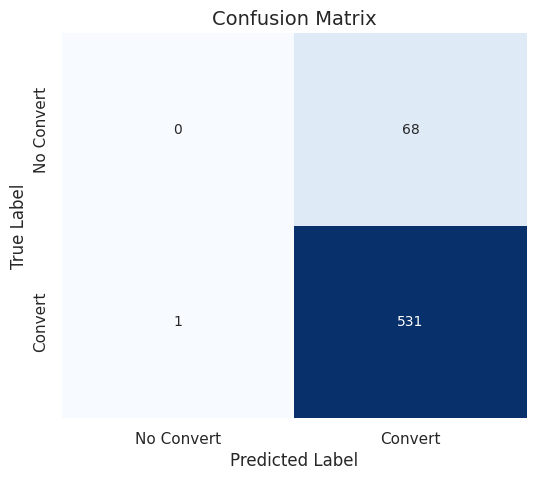


--- Classification Report (Model Performance) ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.89      1.00      0.94       532

    accuracy                           0.89       600
   macro avg       0.44      0.50      0.47       600
weighted avg       0.79      0.89      0.83       600



In [9]:
# ==============================================================================
# VI. Communicate Insights & Modeling Prep (Step 8 & Confusion Matrix)
# ==============================================================================

print("\n--- Step 8: Key Insights and Modeling Preparation ---")

# Create Binary Target Variable for Classification
# Conversion Rate is near 100%. We define a successful conversion as 1.0, non-conversion as < 1.0
df['Conversion_Binary'] = np.where(df['Conversion Rate'] == 1.0, 1, 0)
print(f"Total Converting Sessions (1.0): {df['Conversion_Binary'].sum()} ({(df['Conversion_Binary'].sum()/len(df)):.2%})")
print(f"Total Non-Converting Sessions (< 1.0): {len(df) - df['Conversion_Binary'].sum()} ({(1 - df['Conversion_Binary'].sum()/len(df)):.2%})")

# Prepare Features for Modeling (Traffic Source Encoding)
X = df[['Session Duration Log', 'Bounce Rate', 'Previous Visits', 'High_Engagement_Segment']].copy()
X['Traffic Source'] = df['Traffic Source'].str.replace('"', '')
X = pd.get_dummies(X, columns=['Traffic Source'], drop_first=True)
y = df['Conversion_Binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)

# Train a simple Logistic Regression Model
model = LogisticRegression(solver='liblinear', random_state=SEED)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Confusion Matrix (Addressing 'confusion table') ---
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix (Model Prediction of Conversion) ---")
print("Rows: Actual | Columns: Predicted (0=No Convert, 1=Convert)")
print(cm)

# Visualization of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Convert', 'Convert'], yticklabels=['No Convert', 'Convert'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report (Further 'prob statics' for model performance)
print("\n--- Classification Report (Model Performance) ---")
print(classification_report(y_test, y_pred))


step 8 Communicate Insights

In [10]:
# ==============================================================================
# VII. Conclusions and Next Steps (From Report)
# ==============================================================================

print("\n\n#################################################################")
print("#### VII. Summary of Conclusions and Future Work (From Report) ####")
print("#################################################################")

print("\n--- Conclusions and Inferred Knowledge ---")
print("1. Conversion Rate Anomaly (Inferred): The dataset likely describes a highly qualified, pre-filtered, or re-targeted audience, or that the definition of a 'Conversion' is extremely broad. This is evidenced by the overwhelming concentration of the 'Conversion Rate' at 1.0 (100%).")
print("2. User Engagement Skew (Inferred): Engagement is bimodal. Most sessions are short, but the few very long sessions (outliers on the box plot) significantly skew the mean 'Session Duration'. This suggests two user types: quick-converters and highly-engaged explorers.")
print("3. Loyalty Profile (Inferred): The core user profile is a returning visitor, with the mean, median, and mode for 'Previous Visits' clustered around 2.")

print("\n--- Future Work and Additional Questions ---")
print("\nNew Questions:")
print("- Conversion Dissection: Given the near-100% conversion rate, what are the characteristics of the ≈ 1.8% of sessions that *do not* convert? (The confusion matrix shows the model is good at predicting conversion, but we must profile the False Positives/Negatives.)")
print("- Outlier Validation: Are the 'High-Engagement Segment' (long duration) sessions correlated with a specific non-monetary outcome (e.g., newsletter sign-up) that might explain their long presence without a primary conversion?")
print("- Source ROI Prediction: Can we build a classification model to predict a session's conversion outcome based purely on the 'Traffic Source' and 'Previous Visits' to guide marketing spend allocation?")

print("\nNext Steps:")
print("- Focus the analysis on the categorical variable 'Traffic Source' by applying ANOVA or Chi-Square tests to definitively prove the differences in user quality across sources.")
print("- Develop a refined **Binary Classification Model** to predict conversion outcome (Converted vs. Not Converted).")
print("- Conduct time-series analysis if a granular timestamp is available.")



#################################################################
#### VII. Summary of Conclusions and Future Work (From Report) ####
#################################################################

--- Conclusions and Inferred Knowledge ---
1. Conversion Rate Anomaly (Inferred): The dataset likely describes a highly qualified, pre-filtered, or re-targeted audience, or that the definition of a 'Conversion' is extremely broad. This is evidenced by the overwhelming concentration of the 'Conversion Rate' at 1.0 (100%).
2. User Engagement Skew (Inferred): Engagement is bimodal. Most sessions are short, but the few very long sessions (outliers on the box plot) significantly skew the mean 'Session Duration'. This suggests two user types: quick-converters and highly-engaged explorers.
3. Loyalty Profile (Inferred): The core user profile is a returning visitor, with the mean, median, and mode for 'Previous Visits' clustered around 2.

--- Future Work and Additional Questions ---

New Quest

step 9

step 10